<a href="https://colab.research.google.com/github/skawns0724/Machine-Learning/blob/main/0_cv_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCV - Code snippets

### By Joo Soo Jeong / Ph.D

### https://github.com/JSJeong-me/KOSA-Vision

### email: heinem@naver.com

###  Copyrights 2021

In [1]:
!pwd

/content


In [2]:
!ls -l

total 176
-rw-r--r-- 1 root root 172127 Sep 13 05:40 data3.png
drwxr-xr-x 1 root root   4096 Sep  1 19:26 sample_data


![Computer-vision-tasks-Adapted-from.png](attachment:d59cb896-f21f-4a6b-a8a3-74c696d1584d.png)

### !pip install opencv-python==4.4.0.46

### Image reads and wirtes

In [3]:
import cv2
import platform
from matplotlib import pyplot as plt

In [4]:
print('OpenCV version: {}'.format(cv2.__version__))
print('Python version: {}'.format(platform.python_version()))

OpenCV version: 4.1.2
Python version: 3.7.11


In [5]:
!ls -l

total 176
-rw-r--r-- 1 root root 172127 Sep 13 05:40 data3.png
drwxr-xr-x 1 root root   4096 Sep  1 19:26 sample_data


In [6]:
src = cv2.imread('./data3.png')

In [18]:
type(src)

numpy.ndarray

In [20]:
src.ndim # rgb컬러가 3개가 있다는 것

3

In [23]:
src.shape

(441, 592, 3)

In [24]:
rgb_src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

In [8]:
#flipped = cv2.flip(src, -1)

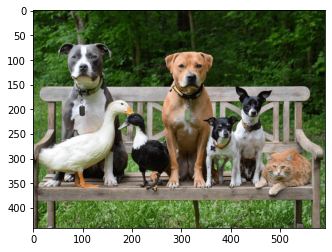

In [25]:
#cv2.imshow('Image', rgb_src)
#cv2.imshow('Image flipped', flipped)

plt.imshow(rgb_src)
plt.show()

In [26]:
rgb_src.shape

(441, 592, 3)

In [27]:
# columv 260:350
# row 70:160
cropped_image = rgb_src[70:175, 260:370]

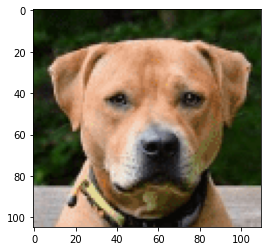

In [28]:
plt.imshow(cropped_image)
plt.show()

In [52]:
cat_image = rgb_src[280:375, 450:565]

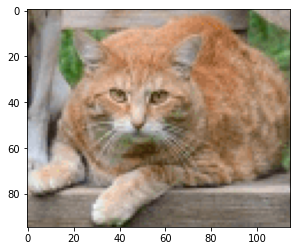

In [53]:
plt.imshow(cat_image)
plt.show()

In [41]:
cat_image.shape

(100, 100, 3)

### Video reads and frame sampling rates controll

In [13]:
import time
import cv2

In [14]:
# 0: Webcam or video mp4, avi etc.imput files
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('.\\images\\park_people.mp4')

In [15]:
# Image resolution, image width & height frame cpunts & frame rates 
print('Frame width:  {0:03d}'.format(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))
print('Frame height: {0:03d}'.format(round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
print('Frame count:  {0:03d}'.format(round(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

fps = round(cap.get(cv2.CAP_PROP_FPS))
print('FPS:          {0:03d}'.format(fps))

Frame width:  000
Frame height: 000
Frame count:  000
FPS:          000


In [16]:
prev_time = 0
FPS = 10

In [17]:
while True:
    ret, frame = cap.read()

    if not ret:
        break
        
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    
    current_time = time.time() - prev_time

    if (ret is True) and (current_time > 1./ FPS):
        prev_time = time.time()
     
        cv2.imshow('frame', frame)

    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()